-----------------------------
#### Embedding layer in Keras
------------------------------

In [4]:
from keras.preprocessing.text import Tokenizer

In [5]:
# Define the sentences
sentences = [
    "I love machine learning",
    "Deep learning is fascinating",
    "Natural language processing is a challenge",
    "I enjoy learning new things",
    "Machine learning models are powerful"
]

# Define the binary labels
labels = [1, 1, 0, 0, 1]

#### tokenization and integer encoding

In [6]:
# Initialize the Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [26]:
# Word index mapping
word_index = tokenizer.word_index
print(word_index)

{'learning': 1, 'i': 2, 'machine': 3, 'is': 4, 'love': 5, 'deep': 6, 'fascinating': 7, 'natural': 8, 'language': 9, 'processing': 10, 'a': 11, 'challenge': 12, 'enjoy': 13, 'new': 14, 'things': 15, 'models': 16, 'are': 17, 'powerful': 18}


In [14]:
# Convert sentences to integer sequences
sequences = tokenizer.texts_to_sequences(sentences)

In [15]:
sequences

[[2, 5, 3, 1],
 [6, 1, 4, 7],
 [8, 9, 10, 4, 11, 12],
 [2, 13, 1, 14, 15],
 [3, 1, 16, 17, 18]]

#### padding
- Since the sentences have different lengths, we pad them to ensure they all have the same length.

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to the same length
max_length = 7  # Maximum length of the sentences after padding
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

padded_sequences

array([[ 2,  5,  3,  1,  0,  0,  0],
       [ 6,  1,  4,  7,  0,  0,  0],
       [ 8,  9, 10,  4, 11, 12,  0],
       [ 2, 13,  1, 14, 15,  0,  0],
       [ 3,  1, 16, 17, 18,  0,  0]])

Each sentence is now represented as a fixed-length sequence of integers, with padding (zeros) added to the end of shorter sentences.

#### Model Construction
- We construct a simple neural network model with an Embedding layer followed by a dense layer for binary classification.

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [19]:
len(word_index)

18

In [20]:
# Define vocabulary size and embedding size
vocab_size    = len(word_index) + 1  # Adding 1 because indexing starts from 1
embedding_dim = 8                    # Dimension of the dense embedding

In [21]:
# Create the model
model = Sequential()

model.add(Embedding(input_dim   = vocab_size,     # 18
                    output_dim  = embedding_dim,  # 8
                    input_length= max_length))    # 7

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 8)              152       
                                                                 
 flatten (Flatten)           (None, 56)                0         
                                                                 
 dense (Dense)               (None, 1)                 57        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Save the model
model.save('my_model.h5')

In [24]:
from keras.utils import plot_model

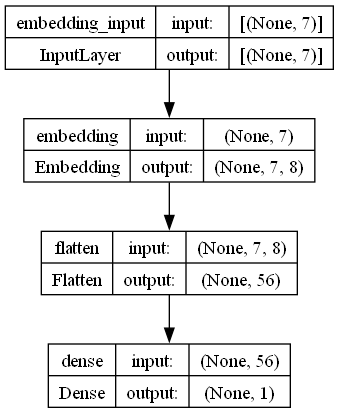

In [25]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [30]:
from tensorflow.keras.layers import Dense, Flatten, Input
model = Sequential()

model.add(Input(shape=(56,)))  # Specify input shape as 56

# Add a Dense layer with 1 node and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the model
model.save('my_model.h5')

In [31]:
pip install keras-visualizer

Note: you may need to restart the kernel to use updated packages.


In [33]:
from keras_visualizer import visualizer

# create your model here
# model = ...

visualizer(model, file_format='png', view=True)

In [ ]:
[[0.3, -0.3, 0.4, ...],  # Embedding for index 2
 [0.6, -0.2, 0.1, ...],  # Embedding for index 5
 [0.5, 0.2, -0.1, ...]]  # Embedding for index 3